In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,  roc_curve, roc_auc_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

In [3]:
data = pd.read_csv('data/11_new.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835072 entries, 0 to 1835071
Data columns (total 43 columns):
 #   Column    Dtype  
---  ------    -----  
 0   record    int64  
 1   age       int64  
 2   race      float64
 3   sex       int64  
 4   ms        float64
 5   hisp      float64
 6   adjinc    float64
 7   educ      float64
 8   pob       int64  
 9   wt        int64  
 10  hhid      int64  
 11  hhnum     int64  
 12  reltrf    float64
 13  occ       float64
 14  majocc    float64
 15  ind       float64
 16  majind    float64
 17  esr       float64
 18  urban     float64
 19  smsast    float64
 20  inddea    int64  
 21  cause113  int64  
 22  follow    int64  
 23  dayod     float64
 24  hosp      float64
 25  hospd     float64
 26  ssnyn     int64  
 27  vt        float64
 28  histatus  float64
 29  hitype    float64
 30  povpct    int64  
 31  stater    int64  
 32  rcow      float64
 33  tenure    float64
 34  citizen   float64
 35  health    float64
 36  indalg  

We note from above that all the attributes are numeric even though the name of some of the attributes (e.g. ms, marital status) sound like they are cateogrical. This dataset has been already pre-encoded with the seemingly categorical attributes numerically encoded. The full description of encoding of all variables is included in the reference manual that came with this dataset

,race,ms,hisp,adjinc,educ,reltrf,occ,majocc,ind,majind,...,tenure,citizen,health,indalg,smok100,agesmk,smokstat,smokhome,curruse,everuse
0,1.0,5.0,3.0,11.0,4.0,1.0,2630.0,2.0,5470.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,3.0,11.0,4.0,5.0,4700.0,4.0,5470.0,5.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,3.0,8.0,4.0,1.0,8960.0,9.0,2980.0,4.0,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,3.0,8.0,1.0,3.0,8960.0,9.0,5470.0,5.0,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,3.0,8.0,NaN,4.0,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835067,1.0,5.0,2.0,4.0,8.0,5.0,4760.0,4.0,4770.0,5.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835068,1.0,1.0,2.0,11.0,6.0,3.0,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835069,1.0,5.0,2.0,11.0,6.0,4.0,NaN,NaN,NaN,NaN,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835070,1.0,NaN,2.0,11.0,NaN,4.0,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


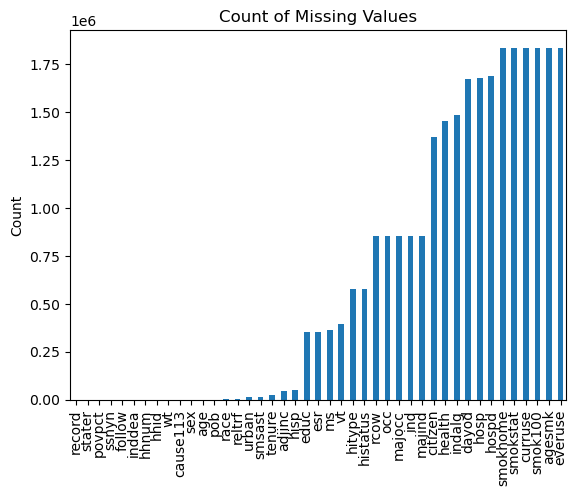

In [5]:
ax = data.isnull().sum().sort_values().plot(kind = 'bar', title='Count of Missing Values')
ax.set_ylabel('Count')
data.loc[:, data.isnull().any()]

Based on above graph, it seems like a lot of attributes have a lot of missing data, therefore we include attributes which have less than 1000000 missing entries for this analysis

In [6]:
data['cause113'].value_counts()

0      1674347
52       18076
55       17954
25       11046
61       10889
        ...   
112          2
39           2
12           1
7            1
1            1
Name: cause113, Length: 106, dtype: int64

In [7]:
# identifying columns with less than 1000000 missing entries: these are the columns that will be retained for further analysis 
df=data[data.columns[data.isnull().sum() < 1000000]]

In [8]:
df.columns

Index(['record', 'age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob',
       'wt', 'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind',
       'esr', 'urban', 'smsast', 'inddea', 'cause113', 'follow', 'ssnyn', 'vt',
       'histatus', 'hitype', 'povpct', 'stater', 'rcow', 'tenure'],
      dtype='object')

In [9]:
df.shape

(1835072, 31)

In [10]:
df=df.dropna()
df.shape

(657736, 31)

We drop certain attributes like record id, cause of mortality, death indicator, household no, length of follow-up, which are not relevant for a realistic mortality predictor. Next, we create an input dataframe df_input with relevant attributes that will go as input to the model

In [11]:
df_input=df.drop(['record', 'inddea', 'cause113', 'follow', 'hhid'], axis=1)

In [12]:
#descriptive statistics of the numeric attributes in df_input
df_input.describe()

,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhnum,...,urban,smsast,ssnyn,vt,histatus,hitype,povpct,stater,rcow,tenure
count,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,...,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000
mean,38.173501,1.189415,1.467063,2.275366,2.825725,9.318175,9.163382,749.867128,133.830522,3.239205,...,1.283548,2.007790,0.743801,0.146100,0.844342,3.301694,12.746775,53.013230,1.419764,1.325749
std,13.381518,0.598130,0.498914,1.722265,0.523338,3.539717,2.644926,358.514516,72.955694,1.559001,...,0.450721,0.752641,0.436533,0.353206,0.362531,1.565211,6.026787,26.255881,0.697796,0.502202
min,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,1.000000
25%,28.000000,1.000000,1.000000,1.000000,3.000000,7.000000,8.000000,906.000000,80.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000,8.000000,31.000000,1.000000,1.000000
50%,37.000000,1.000000,1.000000,1.000000,3.000000,10.000000,8.000000,926.000000,133.000000,3.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,4.000000,13.000000,54.000000,1.000000,1.000000
75%,47.000000,1.000000,2.000000,4.000000,3.000000,12.000000,11.000000,940.000000,176.000000,4.000000,...,2.000000,3.000000,1.000000,0.000000,1.000000,4.000000,18.000000,74.000000,2.000000,2.000000
max,90.000000,5.000000,2.000000,5.000000,3.000000,14.000000,14.000000,960.000000,1522.000000,26.000000,...,2.000000,3.000000,1.000000,1.000000,1.000000,5.000000,21.000000,95.000000,5.000000,3.000000


Based on the above summary, it does not appear that there are outliers or anything out of ordinary in the numeric entries in the input dataframe that needs to be addressed before train/testing the data

Define a target mortality variable. Note that this variable is not included in the input dataframe

In [13]:
df['mortality']=1
df.loc[df['cause113']==0,'mortality']=0

### Supervised Machine Learning
The goal here is to build models of different classifiers with the objective of predicting mortality based on the input attributes. It is a binary classification task and different classifiers including Logistic Regression, Random Forest, Gradient Boosting Classifier, Naive Bayes and Mult-Layer Percepton Classifier (from scikit neural networks) are compared in terms of their ROC areas for sensitivity/specificity to mortality.

In [45]:
# defining input and target variables for supervised machine learning
X=df_scaled
y= df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Synthetic Minority Oversampling for addressing class imbalance
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [46]:
#logistic Regression Model

logreg = LogisticRegression().fit(X_train_res, y_train_res)

preds = logreg.predict(X_test)

accuracy = accuracy_score(y_test, preds)

fscore = f1_score(y_test, preds)

recall = recall_score(y_test, preds)

print('Accuracy:', np.around(accuracy,2))
print('F1 score:', np.around(fscore,2))
print('Recall:', np.around(recall,2))
print(classification_report(y_test, preds))

Accuracy: 0.77
F1 score: 0.21
Recall: 0.73
              precision    recall  f1-score   support

           0       0.98      0.77      0.86    157392
           1       0.12      0.73      0.21      7042

    accuracy                           0.77    164434
   macro avg       0.55      0.75      0.54    164434
weighted avg       0.95      0.77      0.84    164434



In [50]:
#Random Forest Classifier

rf_clf= RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train_res, y_train_res)


preds_rf = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, preds_rf)

fscore_rf = f1_score(y_test, preds_rf)

recall_rf= recall_score(y_test, preds_rf)

print('Accuracy for Random Forest classifier:', np.around(accuracy_rf,2))
print('F1 score for Random Forest classifier:', np.around(fscore_rf,2))
print('Recall for Random Forest classifer:', np.around(recall_rf,2))
print(classification_report(y_test, preds_rf))



Accuracy for Random Forest classifier: 0.95
F1 score for Random Forest classifier: 0.24
Recall for Random Forest classifer: 0.17
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    157392
           1       0.43      0.17      0.24      7042

    accuracy                           0.95    164434
   macro avg       0.70      0.58      0.61    164434
weighted avg       0.94      0.95      0.95    164434



In [51]:
# Naive Bayes classifier

gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82    157392
           1       0.10      0.70      0.17      7042

    accuracy                           0.70    164434
   macro avg       0.54      0.70      0.49    164434
weighted avg       0.94      0.70      0.79    164434



In [86]:
# Gradient Boosting Classifier

gbt_clf = GradientBoostingClassifier(loss='log_loss', #deviance or explonential
                               criterion='squared_error', # {‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}, default=’friedman_mse’
                               learning_rate=0.1, # default 1.0
                               subsample=1.0, #default=1.0
                               random_state=0, # random state for reproducibility
                               max_features='sqrt', # number of random features to use sqrt(n_features)
                               min_samples_leaf=1000, # minimum no of observarions allowed in a leaf
                               max_depth=3, # maximum depth of the tree
                               n_estimators=500 # how many trees to build
                              )

gbt_clf.fit(X_train_res, y_train_res)
print(classification_report(y_test, gbt_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    157392
           1       0.33      0.27      0.30      7042

    accuracy                           0.94    164434
   macro avg       0.65      0.62      0.63    164434
weighted avg       0.94      0.94      0.94    164434



In [53]:
# MLP Classifier

from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=1000,activation = 'relu',solver='adam',random_state=0)
mlp_classifier.fit(X_train_res, y_train_res)
print(classification_report(y_test, mlp_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93    157392
           1       0.16      0.44      0.23      7042

    accuracy                           0.87    164434
   macro avg       0.56      0.67      0.58    164434
weighted avg       0.94      0.87      0.90    164434



Text(0.5, 1.0, 'Comparing ROC curves for different classifiers')

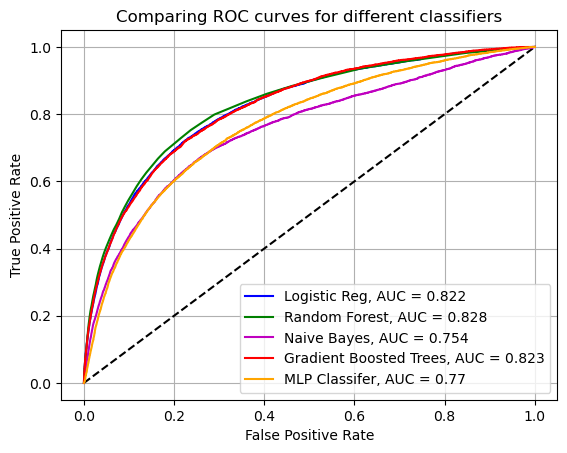

In [54]:
#compare ROC curves for different models

plt.plot([0, 1], [0, 1],'k--')


fpr_logreg, tpr_logreg, thresh_logreg = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
fpr_gnb, tpr_gnb, thresh_gnb = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
fpr_gbt, tpr_gbt, thresh_gbt = roc_curve(y_test, gbt_clf.predict_proba(X_test)[:,1])
fpr_mlp, tpr_mlp, thresh_mlp = roc_curve(y_test, mlp_classifier.predict_proba(X_test)[:,1])



auc_logreg = roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1] )
auc_rf = roc_auc_score(y_test,rf_clf.predict_proba(X_test)[:,1] )
auc_gnb = roc_auc_score(y_test,gnb.predict_proba(X_test)[:,1] )
auc_gbt = roc_auc_score(y_test,gbt_clf.predict_proba(X_test)[:,1] )
auc_mlp = roc_auc_score(y_test,mlp_classifier.predict_proba(X_test)[:,1] )



plt.plot(fpr_logreg, tpr_logreg,'b', label=f'Logistic Reg, AUC = {str(round(auc_logreg,3))}')
plt.plot(fpr_rf, tpr_rf,'g', label=f'Random Forest, AUC = {str(round(auc_rf,3))}')
plt.plot(fpr_gnb, tpr_gnb,'m', label=f'Naive Bayes, AUC = {str(round(auc_gnb,3))}')
plt.plot(fpr_gbt, tpr_gbt, 'r', label=f'Gradient Boosted Trees, AUC = {str(round(auc_gbt,3))}')
plt.plot(fpr_mlp, tpr_mlp,'orange', label=f'MLP Classifer, AUC = {str(round(auc_mlp,3))}')







plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('Comparing ROC curves for different classifiers')

### Based on ROC AUC, the best classifier is the Random Forest model with an AUC of 0.83.

Text(0, 0.5, 'True/False Positive Rates')

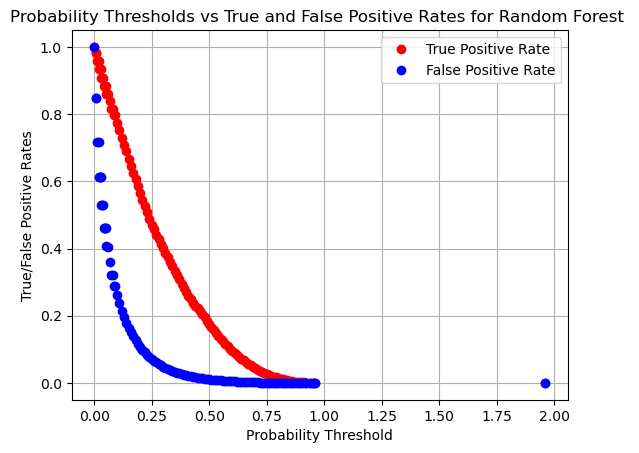

In [84]:
plt.plot(thresh_rf, tpr_rf, 'ro', label='True Positive Rate')
plt.plot(thresh_rf, fpr_rf, 'bo', label='False Positive Rate')
plt.legend()
plt.grid()
plt.title('Probability Thresholds vs True and False Positive Rates for Random Forest ')
plt.xlabel('Probability Threshold')
plt.ylabel('True/False Positive Rates')

We take our best model, the Random Forest classifier, and tune the hyperparameters using RandomizedSearchCV. RandomizedSearchCV was chosen instead of the regular GridSearchCV as the latter was not efficient from the 'run-time' perspective on this fairly large dataset.

In [63]:
# Number of trees in random forest
n_estimators = [50, 75, 100]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
random_search_cv_rfclf = RandomizedSearchCV(RandomForestClassifier(random_state=0, n_jobs=-1), random_grid, verbose=1, cv=3, scoring='roc_auc')
random_search_cv_rfclf.fit(X_train, y_train)

random_search_cv_rfclf.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomForestClassifier(min_samples_leaf=4, min_samples_split=10, n_jobs=-1,
                       random_state=0)

Text(0.5, 1.0, 'Comparing ROC curves for Default Random Forest  and\n Hyperparameter-Optimized Random Forest ')

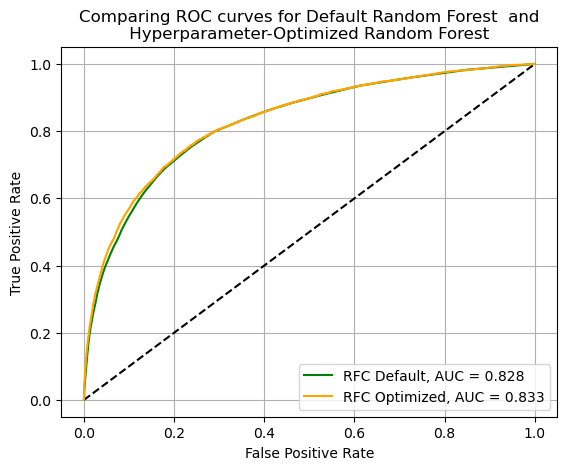

In [64]:
plt.plot([0, 1], [0, 1],'k--')



fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
fpr_random_search_cv_rfclf, tpr_random_search_cv_rfclf, thresh_random_search_cv_rfclf = roc_curve(y_test, random_search_cv_rfclf.predict_proba(X_test)[:,1])


auc_rf = roc_auc_score(y_test,rf_clf.predict_proba(X_test)[:,1] )
auc_random_search_cv_rfclf = roc_auc_score(y_test,random_search_cv_rfclf.predict_proba(X_test)[:,1] )



plt.plot(fpr_rf, tpr_rf,'g', label=f'RFC Default, AUC = {str(round(auc_rf,3))}')
plt.plot(fpr_random_search_cv_rfclf, tpr_random_search_cv_rfclf,'orange', label=f'RFC Optimized, AUC = {str(round(auc_random_search_cv_rfclf,3))}')



plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('Comparing ROC curves for Default Random Forest  and\n Hyperparameter-Optimized Random Forest ')

**There was not much difference in performances of the default random forest and hyper-parameter optimized random forest with both having an AUC of ~ 0.83**